In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/100-highest-paid-athletes-of-the-world/100 Highest-Paid Athletes in the World - Sheet1.csv")
df.head()

,Rank,Athlete,Sports,Team,Unnamed: 4,Nationality,Salary,Endorsements,Total
0,1,Cristiano Ronaldo,⚽,Al-Nassr,NaN,Portuguese\n,$215M,$60M,$275M
1,2,Jon Rahm,🏌️‍♂️,NaN,NaN,Spanish,$181M,$22M,$203M
2,3,Lionel Messi,⚽,Inter Miami,NaN,Argentine,$65M,$65M,$130M
3,4,LeBron James,🏀,Los Angeles Lakers,NaN,American,$45.7M,$80M,$125.7M
4,5,Kylian Mbappé,⚽,Paris Saint-Germain,NaN,French,$100M,$25M,$125M


In [3]:
df.shape

(100, 9)

In [4]:
df.tail()

,Rank,Athlete,Sports,Team,Unnamed: 4,Nationality,Salary,Endorsements,Total
95,96,De'Aaron Fox,🏀,Sacramento Kings,NaN,American,$30.9M,$2M,$32.9M
96,97,Miguel Cabrera,⚾,Detroit Tigers,NaN,Venezuelan,$32M,$750K,$32.8M
97,98,Bam Adebayo,🏀,Miami Heat,NaN,American,$31.2M,$1.5M,$32.7M
98,99,Giancarlo Stanton,⚾,New York Yankees,NaN,American,$32M,$600K,$32.6M
99,100,Derek Carr,🏈,New Orleans Saints,NaN,American,$30M,$2.5M,$32.5M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Athlete       100 non-null    object 
 2   Sports        100 non-null    object 
 3   Team          82 non-null     object 
 4   Unnamed: 4    0 non-null      float64
 5   Nationality   100 non-null    object 
 6   Salary        100 non-null    object 
 7   Endorsements  100 non-null    object 
 8   Total         100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,100.0,50.46,29.011464,1.0,25.75,50.5,75.25,100.0
Unnamed: 4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

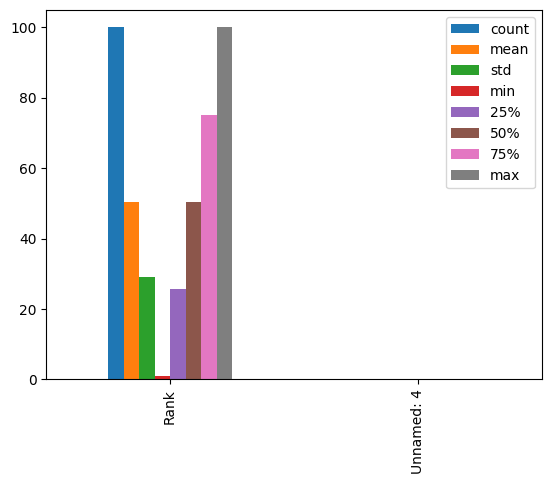

In [7]:
df.describe().T.plot(kind='bar')

In [8]:
df.isna().sum()

Rank              0
Athlete           0
Sports            0
Team             18
Unnamed: 4      100
Nationality       0
Salary            0
Endorsements      0
Total             0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: >

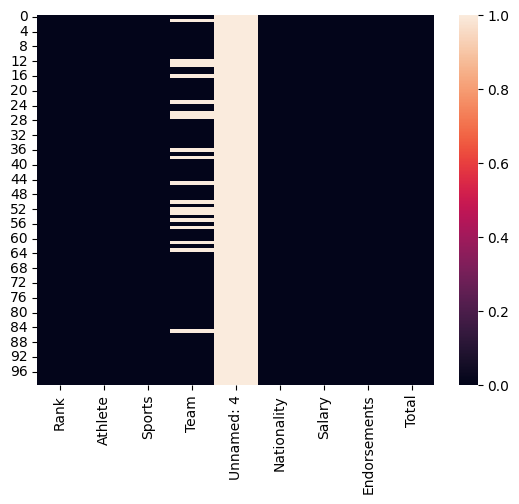

In [10]:
sns.heatmap(df.isna())

In [11]:
df


,Rank,Athlete,Sports,Team,Unnamed: 4,Nationality,Salary,Endorsements,Total
0,1,Cristiano Ronaldo,⚽,Al-Nassr,NaN,Portuguese\n,$215M,$60M,$275M
1,2,Jon Rahm,🏌️‍♂️,NaN,NaN,Spanish,$181M,$22M,$203M
2,3,Lionel Messi,⚽,Inter Miami,NaN,Argentine,$65M,$65M,$130M
3,4,LeBron James,🏀,Los Angeles Lakers,NaN,American,$45.7M,$80M,$125.7M
4,5,Kylian Mbappé,⚽,Paris Saint-Germain,NaN,French,$100M,$25M,$125M
...,...,...,...,...,...,...,...,...,...
95,96,De'Aaron Fox,🏀,Sacramento Kings,NaN,American,$30.9M,$2M,$32.9M
96,97,Miguel Cabrera,⚾,Detroit Tigers,NaN,Venezuelan,$32M,$750K,$32.8M
97,98,Bam Adebayo,🏀,Miami Heat,NaN,American,$31.2M,$1.5M,$32.7M
98,99,Giancarlo Stanton,⚾,New York Yankees,NaN,American,$32M,$600K,$32.6M


In [12]:
top_Athlete =df[['Athlete', 'Total']]

In [13]:
top_Athlete

,Athlete,Total
0,Cristiano Ronaldo,$275M
1,Jon Rahm,$203M
2,Lionel Messi,$130M
3,LeBron James,$125.7M
4,Kylian Mbappé,$125M
...,...,...
95,De'Aaron Fox,$32.9M
96,Miguel Cabrera,$32.8M
97,Bam Adebayo,$32.7M
98,Giancarlo Stanton,$32.6M


In [14]:

df = pd.DataFrame(df)

# Function to clean the 'Total' column
def clean_total(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace('M', '000000').replace('K', '000').replace('B', '000000000')
        # Handle potential decimal values
        try:
            value = float(value)
        except ValueError:
            return None
        return int(value)
    return None

# Apply the function to the 'Total' column
df['Total'] = df['Total'].apply(clean_total)

# Verify the change
print(df['Total'])
print(df['Total'].dtype)

0     275000000
1     203000000
2     130000000
3           125
4     125000000
        ...    
95           32
96           32
97           32
98           32
99           32
Name: Total, Length: 100, dtype: int64
int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Athlete       100 non-null    object 
 2   Sports        100 non-null    object 
 3   Team          82 non-null     object 
 4   Unnamed: 4    0 non-null      float64
 5   Nationality   100 non-null    object 
 6   Salary        100 non-null    object 
 7   Endorsements  100 non-null    object 
 8   Total         100 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB


In [16]:
df = pd.DataFrame(df)

# Assuming df is your DataFrame
top_Athlete = df[['Athlete', 'Total']]

# Create a vertical bar plot with 'Athlete' on x-axis and 'Total' on y-axis
fig = px.bar(
    top_Athlete,
    x='Athlete',
    y='Total',
    title='Total by Athlete',
    labels={'Total': 'Total', 'Athlete': 'Athlete'},
    text='Total'  # Display values on the bars
)

# Customize the layout
fig.update_layout(
    xaxis_title='Athlete',
    yaxis_title='Total',
    template='plotly_white'  # Optional: changes the background to white
)

# Update text positioning
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

# Show the plot
fig.show()

In [17]:
import plotly.express as px

# Assuming df is your DataFrame
top_Athlete = df[['Athlete', 'Total']].head(10)

# Sort the DataFrame by 'Total' to get a better visualization
top_Athlete = top_Athlete.sort_values(by='Total', ascending=False)

# Create a horizontal bar plot with text labels
fig = px.bar(
    top_Athlete,
    x='Total',
    y='Athlete',
    orientation='h',
    title='Total by Athlete',
    labels={'Total': 'Total', 'Athlete': 'Athlete'},
    text='Total'  # Add text labels to each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Total',
    yaxis_title='Athlete',
    yaxis=dict(categoryorder='total ascending'),  # Optional: sorts athletes by total
    template='plotly_white'  # Optional: changes the background to white
)

# Update text positioning
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

# Show the plot
fig.show()


In [18]:
df.columns.tolist()

['Rank',
 'Athlete',
 'Sports',
 'Team',
 'Unnamed: 4',
 'Nationality',
 'Salary',
 'Endorsements',
 'Total']

In [19]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Rank',
 'Athlete',
 'Sports',
 'Team',
 'Nationality',
 'Salary',
 'Endorsements',
 'Total']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [20]:
df

,Rank,Athlete,Sports,Team,Unnamed: 4,Nationality,Salary,Endorsements,Total
0,1,Cristiano Ronaldo,⚽,Al-Nassr,NaN,Portuguese\n,$215M,$60M,275000000
1,2,Jon Rahm,🏌️‍♂️,NaN,NaN,Spanish,$181M,$22M,203000000
2,3,Lionel Messi,⚽,Inter Miami,NaN,Argentine,$65M,$65M,130000000
3,4,LeBron James,🏀,Los Angeles Lakers,NaN,American,$45.7M,$80M,125
4,5,Kylian Mbappé,⚽,Paris Saint-Germain,NaN,French,$100M,$25M,125000000
...,...,...,...,...,...,...,...,...,...
95,96,De'Aaron Fox,🏀,Sacramento Kings,NaN,American,$30.9M,$2M,32
96,97,Miguel Cabrera,⚾,Detroit Tigers,NaN,Venezuelan,$32M,$750K,32
97,98,Bam Adebayo,🏀,Miami Heat,NaN,American,$31.2M,$1.5M,32
98,99,Giancarlo Stanton,⚾,New York Yankees,NaN,American,$32M,$600K,32


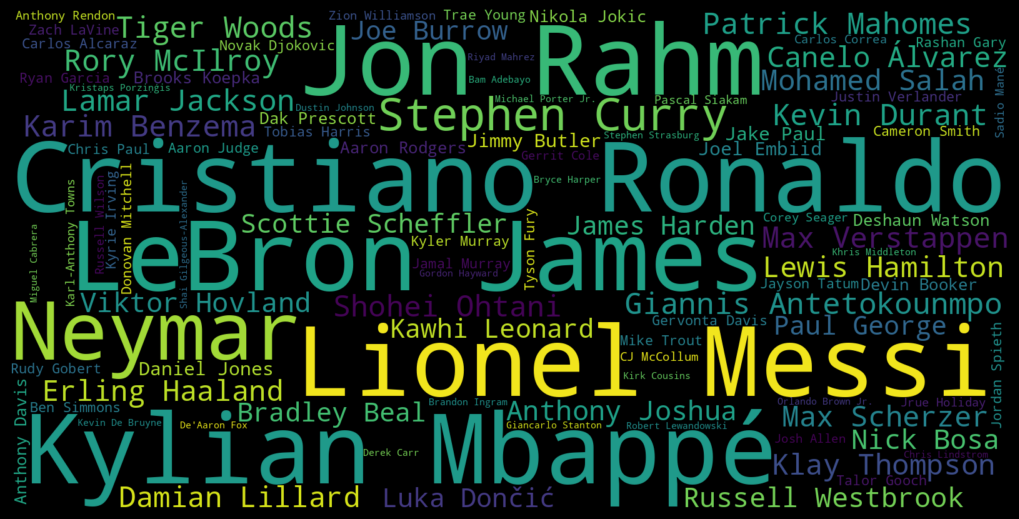

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Athlete"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
